In [155]:
# Importamos librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Parte 1

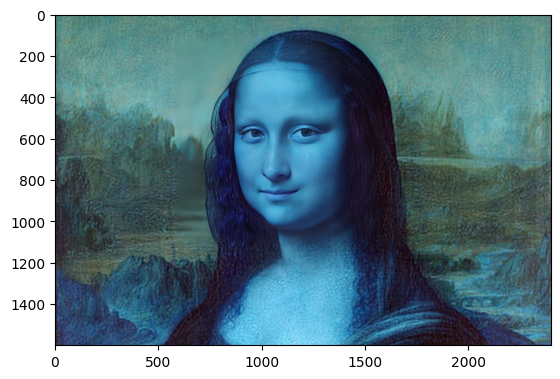

In [156]:
# cargamos imagen
img = cv.imread('./7ARBKZBF3JDNLCJOS2BJEGT6WQ.png')
plt.imshow(img)

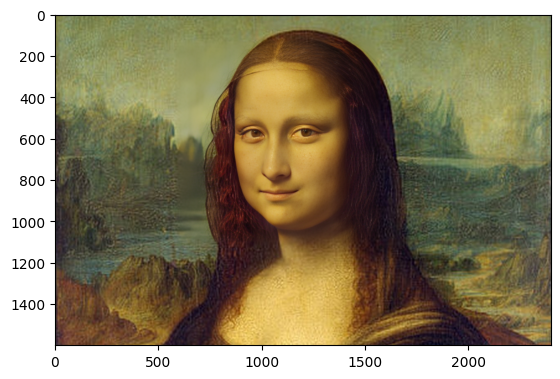

In [157]:
# acomodando colores
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [158]:
# Image size
h,w,_ = img_rgb.shape
print(f"Dimensiones de la imagen: {h} x {w}")

Dimensiones de la imagen: 1600 x 2400


Text(0.5, 1.0, 'Imgen con Desenfoque')

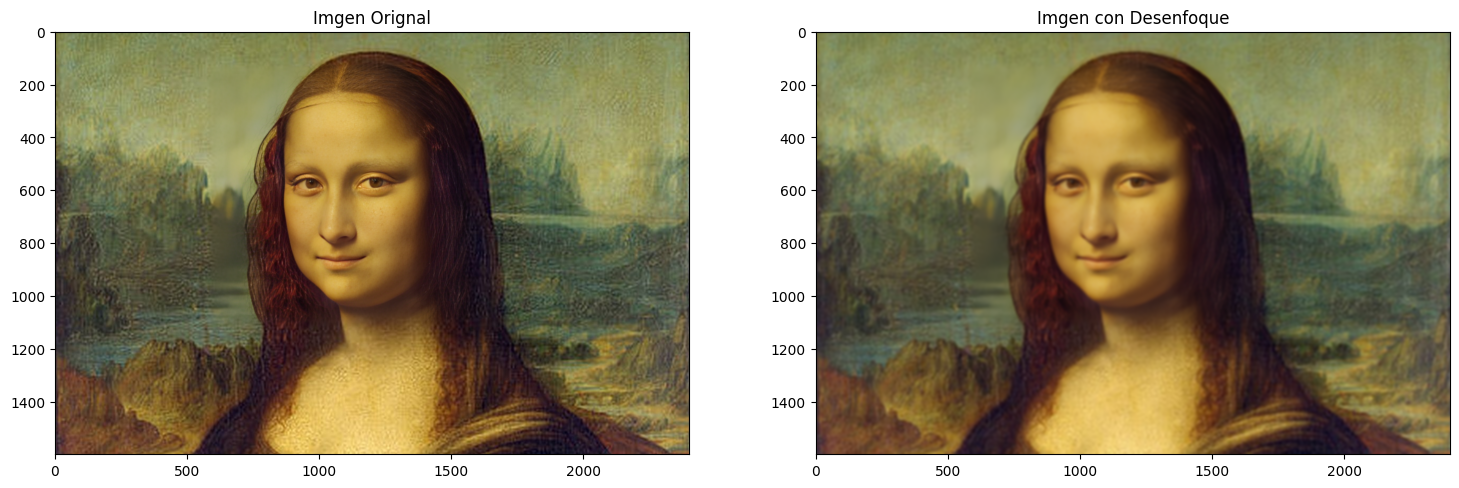

In [159]:
# filtro espacial con gauss (desenfoque)
f_espacial = cv.GaussianBlur(img_rgb, ksize=(17, 17), sigmaX=5)

figure = plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.imshow(img_rgb)
plt.title("Imgen Orignal")

ax2 = plt.subplot(222)
plt.imshow(f_espacial)
plt.title("Imgen con Desenfoque")


In [160]:
# Para crear filtros gaussianos en el dom espectral
def create_gauss_filter(h, w, k_size, sigma):
    # Pasos:
    ## Generar el kernel en el dom espacial
    kernel_xy = cv.getGaussianKernel(k_size, sigma)
    kernel = kernel_xy * kernel_xy.T

    ## Agregar padding de ceros para llevar el kernel a la dim de h x w
    # Calcular la cantidad de padding necesaria
    pad_height = (h - k_size)  // 2
    pad_width =  (w - k_size) // 2

    # hacemos matriz de ceros de dimensionses h x w
    kernel_padding = np.zeros((h,w))
    # hacemos el padding con el kernel, donde los valores del kernel deberían quedar en el medio
    kernel_padding[pad_height: pad_height + k_size, pad_width: pad_width + k_size] = kernel

    ## Luego aplicar la trans de fourier a eso
    # filtro gaussiano
    kernel_g = kernel_padding
    # creamos transf de fourier
    kernel_f = np.fft.fft2(kernel_g)

    return kernel_g, kernel_f

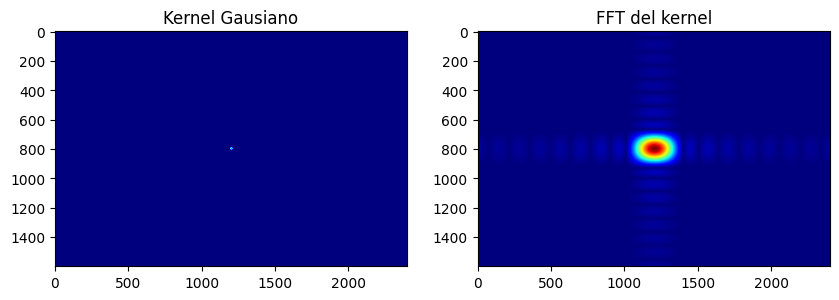

In [161]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=17, sigma=5)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')

plt.subplot(222)
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

In [162]:
print(f"Tamaño de filtro gaussiano dom espacial: {kernel.shape}")
print(f"Tamaño de filtro gaussiano con tf: {kernel_tf.shape}")
print(f"Tamaño de la imagen original: {img_rgb.shape}")

Tamaño de filtro gaussiano dom espacial: (1600, 2400)
Tamaño de filtro gaussiano con tf: (1600, 2400)
Tamaño de la imagen original: (1600, 2400, 3)


Text(0.5, 1.0, 'Imgen con Desenfoque')

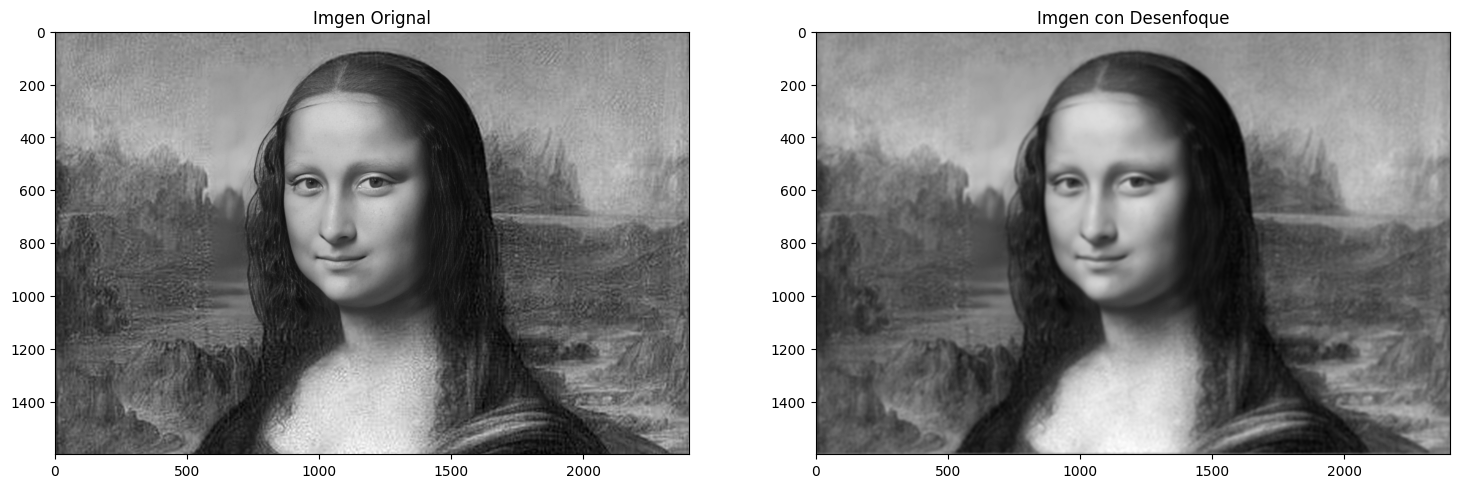

In [163]:
# converting image to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# aplicamos la trans fourier a la imagen y aplicamos filtro
img_fft = np.fft.fft2(img_gray)
filter_f = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filter_f)))

plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.imshow(img_gray, cmap='gray')
plt.title("Imgen Orignal")

ax2 = plt.subplot(222)
plt.imshow(img_gauss, cmap='gray')
plt.title("Imgen con Desenfoque")


Text(0.5, 1.0, 'Imgen con Gaussian Blur')

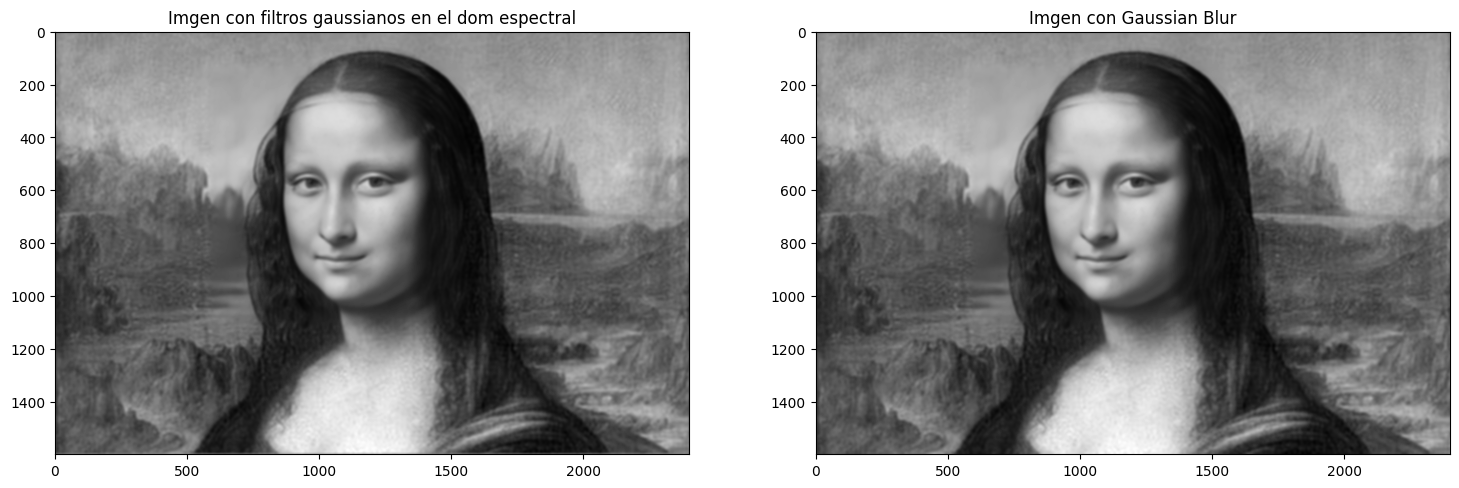

In [164]:
# Comprobamos de vuelta con gaussian blur
f_espacial = cv.GaussianBlur(img_gray, ksize=(17, 17), sigmaX=5)

plt.figure(figsize=(18,18))
ax3 = plt.subplot(221)
plt.imshow(img_gauss, cmap='gray')
plt.title("Imgen con filtros gaussianos en el dom espectral")

ax4 = plt.subplot(222)
plt.imshow(f_espacial, cmap='gray')
plt.title("Imgen con Gaussian Blur")

#### Probamos distintos tamaños de kernel y sigma 

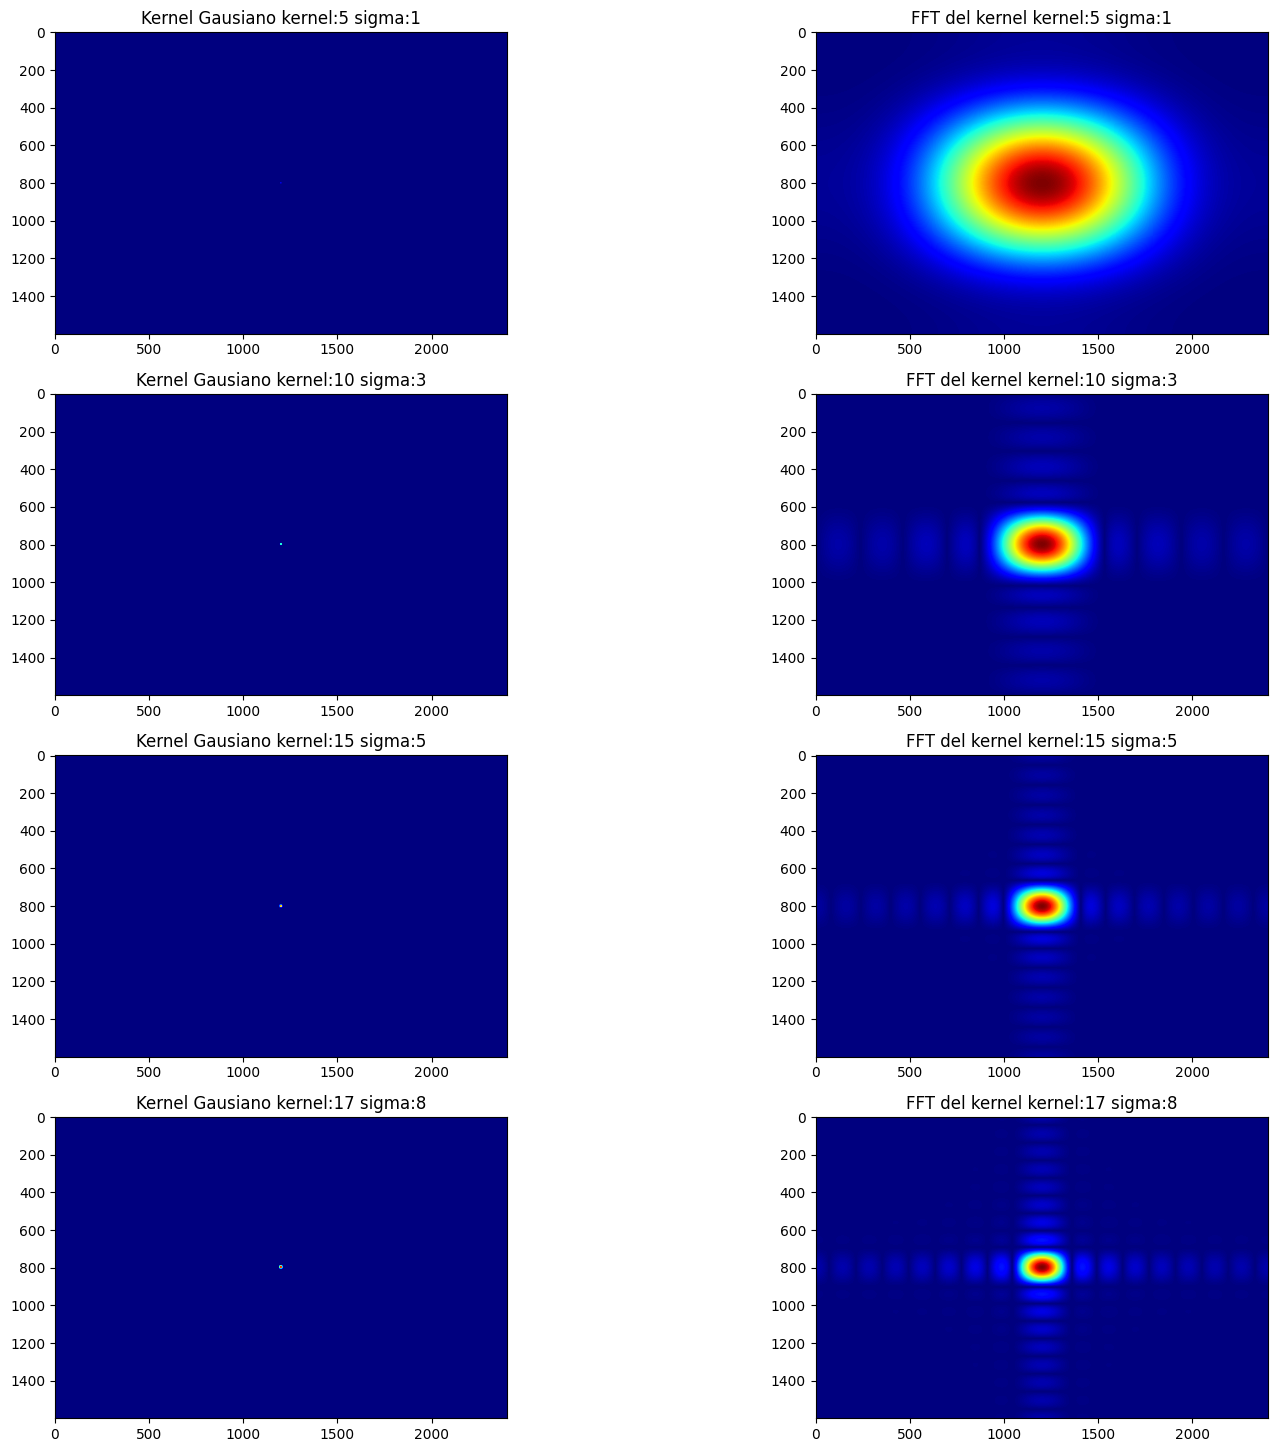

In [171]:
k_s = [5,10,15,17]
sig = [1,3,5,8]
plt.figure(figsize=(18,18))
for i in range (4):
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_s[i], sigma=sig[i])
    
    if i == 0:
        plt.subplot(421)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(422)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')
    elif i == 1:
        plt.subplot(423)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(424)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')
    elif i == 2:
        plt.subplot(425)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(426)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')
    else:
        plt.subplot(427)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(428)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')

**Analisis**

## Parte 2